In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [176]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [177]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [178]:
# li = df['Sleep Disorder'].values=='None'
# count=0
# for item in li:
#     if item==True:
#         count+=1

# print(count)

In [179]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [181]:
df.count()

Person ID                  374
Gender                     374
Age                        374
Occupation                 374
Sleep Duration             374
Quality of Sleep           374
Physical Activity Level    374
Stress Level               374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64

In [182]:
label_encoder_gender=LabelEncoder()
df['Gender']=label_encoder_gender.fit_transform(df['Gender'])
df['Occupation']=label_encoder_gender.fit_transform(df['Occupation'])
df['BMI Category']=label_encoder_gender.fit_transform(df['BMI Category'])

In [183]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [184]:
df['Sleep Disorder']=df['Sleep Disorder'].map({"None":"0", "Sleep Apnea":"1", "Insomnia":"2"})

In [185]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [186]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,3,126/83,77,4200,0
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,0
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,0
3,4,1,28,6,5.9,4,30,8,2,140/90,85,3000,1
4,5,1,28,6,5.9,4,30,8,2,140/90,85,3000,1


In [187]:
df['high_bp']=df['Blood Pressure'].str.split('/').str[0]
df['low_bp']=df['Blood Pressure'].str.split('/').str[1]

In [188]:
df.drop('Blood Pressure',axis=1, inplace=True)
df['Sleep_Problem']=df['Sleep Disorder']
df.drop('Sleep Disorder',axis=1, inplace=True)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,high_bp,low_bp,Sleep_Problem
0,1,1,27,9,6.1,6,42,6,3,77,4200,126,83,0
1,2,1,28,1,6.2,6,60,8,0,75,10000,125,80,0
2,3,1,28,1,6.2,6,60,8,0,75,10000,125,80,0
3,4,1,28,6,5.9,4,30,8,2,85,3000,140,90,1
4,5,1,28,6,5.9,4,30,8,2,85,3000,140,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,5,8.1,9,75,3,3,68,7000,140,95,1
370,371,0,59,5,8.0,9,75,3,3,68,7000,140,95,1
371,372,0,59,5,8.1,9,75,3,3,68,7000,140,95,1
372,373,0,59,5,8.1,9,75,3,3,68,7000,140,95,1


In [189]:
df.drop('Person ID', axis=1, inplace=True)

In [190]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
high_bp                    0
low_bp                     0
Sleep_Problem              0
dtype: int64

<AxesSubplot:>

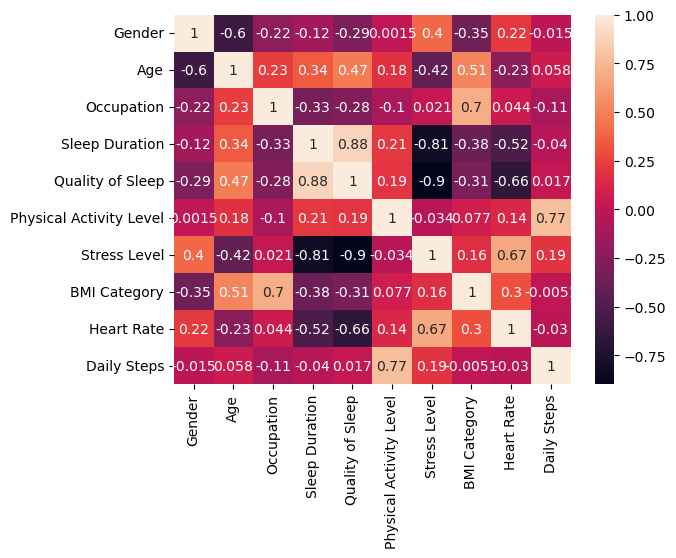

In [116]:
sns.heatmap(df.corr(), annot=True)

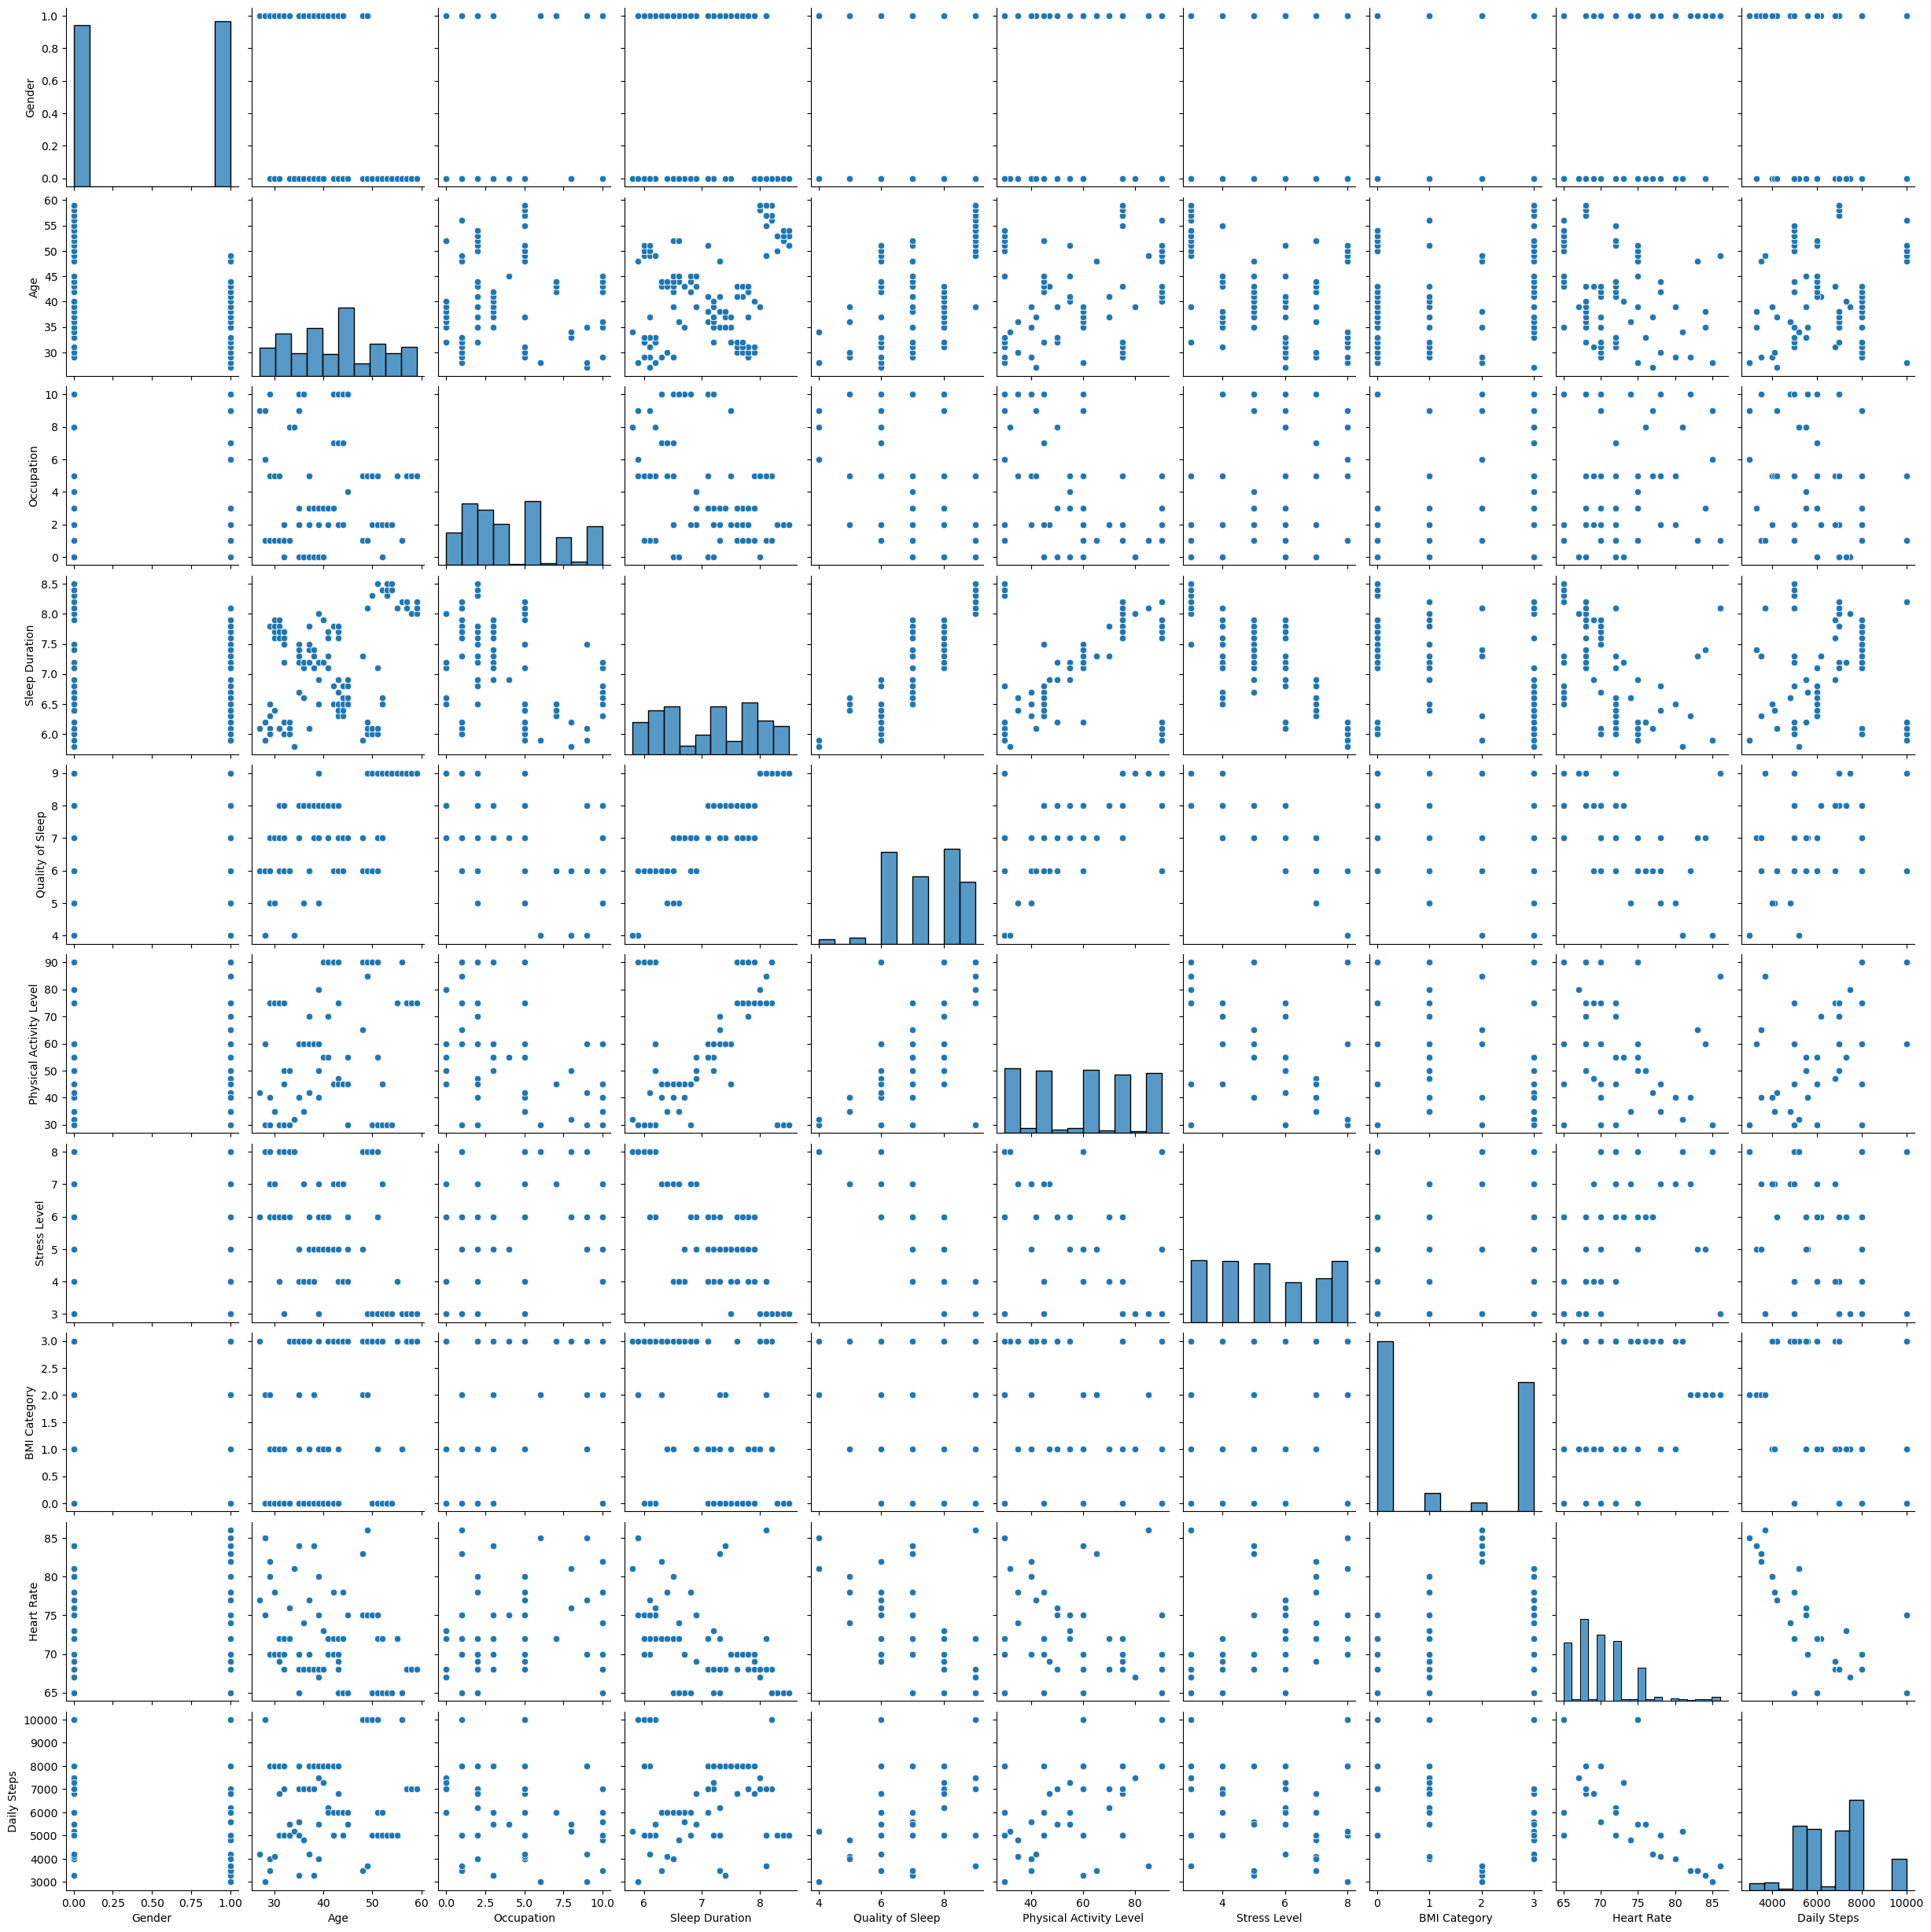

In [86]:
sns.pairplot(df)

In [191]:
X = df.drop('Sleep_Problem', axis=1)
y = df['Sleep_Problem']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [192]:
print(X_train.head())
print(X_train_scaled[:5])

     Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
192       1   43           7             6.5                 6   
75        1   33           1             6.0                 6   
84        1   35           9             7.5                 8   
362       0   59           5             8.2                 9   
16        0   29           5             6.5                 5   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
192                       45             7             3          72   
75                        30             8             0          72   
84                        60             5             1          70   
362                       75             3             3          68   
16                        40             7             1          80   

     Daily Steps high_bp low_bp  
192         6000     130     85  
75          5000     125     80  
84          8000     120     80  
362         7000     140     95  


In [193]:
print(len(X_train_scaled))
print(len(X_test_scaled))

299
75


# Classification Techniques

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [197]:
models={
    'svm':SVC(kernel='rbf'),
    'Naive_bayes':MultinomialNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RF': RandomForestClassifier(random_state=42),
    'Adaboost': AdaBoostClassifier(n_estimators=50, random_state=42),
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'Gradient_boost': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'DT': DecisionTreeClassifier(random_state=42)
}

In [198]:
results={}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    results[name]=acc
    print(f"{name} Accuracy: {acc:4f}")
    print(classification_report(y_test, y_pred))
    print("-"*60)

print("Summary of Accuracy: ", results)

svm Accuracy: 0.626667
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        43
           1       0.80      0.25      0.38        16
           2       0.00      0.00      0.00        16

    accuracy                           0.63        75
   macro avg       0.47      0.42      0.38        75
weighted avg       0.52      0.63      0.52        75

------------------------------------------------------------
Naive_bayes Accuracy: 0.626667
              precision    recall  f1-score   support

           0       0.92      0.53      0.68        43
           1       0.83      0.62      0.71        16
           2       0.37      0.88      0.52        16

    accuracy                           0.63        75
   macro avg       0.71      0.68      0.64        75
weighted avg       0.78      0.63      0.65        75

------------------------------------------------------------
KNN Accuracy: 0.866667
              precision    recall  f1-s

c:\Users\Lenovo\anaconda3\envs\MLDL\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\envs\MLDL\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\anaconda3\envs\MLDL\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF Accuracy: 0.880000
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.85      0.69      0.76        16
           2       0.72      0.81      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

------------------------------------------------------------
Adaboost Accuracy: 0.666667
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        43
           1       0.75      0.19      0.30        16
           2       0.50      0.69      0.58        16

    accuracy                           0.67        75
   macro avg       0.66      0.57      0.55        75
weighted avg       0.69      0.67      0.64        75

------------------------------------------------------------
Bagging Accuracy: 0.893333
              precision    recall  f1-s